# P50_51 little loss landscape with hidden valley

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x and y values
x = np.linspace(-2.5, 2.5, 256)
y = np.linspace(-2.5, 2.5, 256)
X, Y = np.meshgrid(x, y)

# Create the large paraboloid (global minimum at (0,0))
Z_large = 0.2 * (X**2 + Y**2)

# Create the small paraboloid (local minimum) at position (1.5, -1.0)
local_min_x = 1.0
local_min_y = -1.0
small_width = 0.5  # Controls how narrow the paraboloid is

# Calculate distance from each point to the center of the small paraboloid
distance = (X - local_min_x)**2 + (Y - local_min_y)**2

# Create the small dip - using negative exponential to create a valley
Z_small = -1.0 * np.exp(-distance / small_width)

# Combine the two surfaces
Z = Z_large + Z_small

In [58]:
save_dir='/Users/stephen/Stephencwelch Dropbox/Stephen Welch/welch_labs/backpropagation/hackin/p50/'

In [66]:
plt.figure(frameon=False)
ax = plt.Axes(plt.gcf(), [0., 0., 1., 1.])
ax.set_axis_off()
plt.gcf().add_axes(ax)
plt.imshow(np.rot90(Z)) #have to transpose if transposing u and v and param_surface_1
plt.savefig(save_dir+'p50_2d.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.close()

In [67]:
np.save(save_dir+'p50_2d', Z)

In [61]:
save_dir+'p50_2d'

'/Users/stephen/Stephencwelch Dropbox/Stephen Welch/welch_labs/backpropagation/hackin/p50/p50_2d'

In [65]:
# Z

array([[2.5       , 2.48046905, 2.46109189, ..., 2.46093622, 2.48033034,
        2.49987659],
       [2.48046905, 2.4609381 , 2.44156094, ..., 2.44138597, 2.46078219,
        2.48033034],
       [2.46109189, 2.44156094, 2.42218378, ..., 2.42198742, 2.44138597,
        2.46093622],
       ...,
       [2.46109189, 2.44156094, 2.42218378, ..., 2.42218378, 2.44156094,
        2.46109189],
       [2.48046905, 2.4609381 , 2.44156094, ..., 2.44156094, 2.4609381 ,
        2.48046905],
       [2.5       , 2.48046905, 2.46109189, ..., 2.46109189, 2.48046905,
        2.5       ]])

In [62]:
Z.shape

(256, 256)

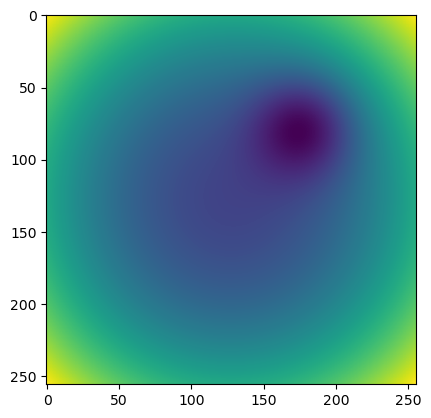

In [63]:
plt.imshow(Z)

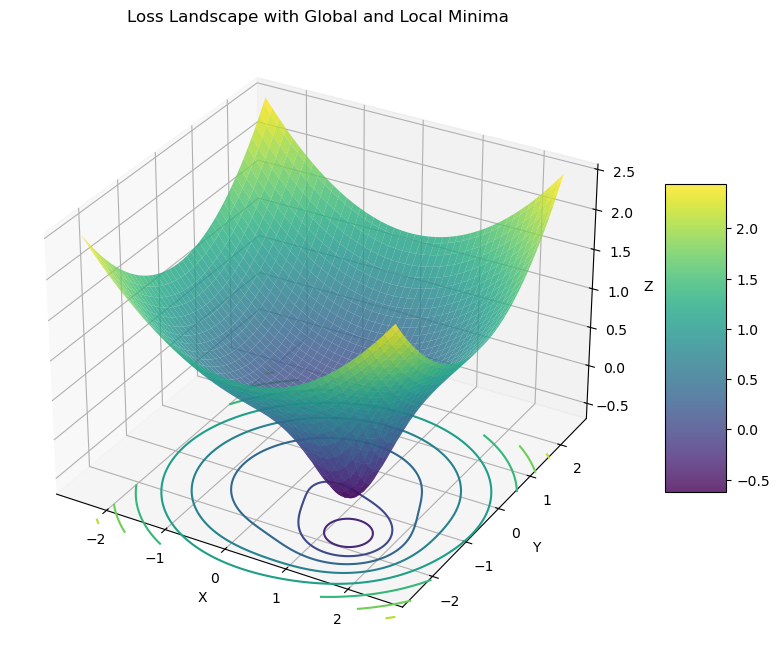

In [64]:
# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Loss Landscape with Global and Local Minima')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Add a contour plot beneath
cset = ax.contour(X, Y, Z, zdir='z', offset=Z.min()-0.5, cmap='viridis')

plt.show()

# If you want just the numpy array without plotting:
# return Z